In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../capstone/Resources/listing_clean_with_Postal_codes_errors_removed.csv')
df.head()

df_reduced = df[['Price','Beds','Baths','Postal_Code']]
df_reduced.head()

,Price,Beds,Baths,Postal_Code
0,430000,2,2,L5B 1N1
1,598000,2,1,M6H 3Z6
2,750000,4,2,L2R 5Y5
3,1899000,4,4,L8K 3P3
4,899000,4,2,L8V 3M7


In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my_app')

geocode = lambda query: geolocator.geocode("%s, Ontario" % query)

In [14]:
cities = []

count = 0

for pc in df_reduced['Postal_Code']:
    
    location = geocode(pc)
    cities.append(str(location).split(", "))
    count = count+1 
    print(count, " ", pc)


1   L5B 1N1
2   M6H 3Z6
3   L2R 5Y5
4   L8K 3P3
5   L8V 3M7
6   L6M 0G5
7   L6X 0B3
8   L4N 9N7
9   L4J 0G9
10   L4S 0E9
11   M1W 3A4
12   L4W 2B9
13   L1V 1G2
14   L5M 4Z5
15   L0K 1B0
16   L6E 1M1
17   M1M 1X5
18   M9B 1Z9
19   K7M 2R2
20   N5A 6W1
21   M2P 2E3
22   M2J 1M4
23   L9T 6R1
24   N2B 3N1
25   K1V 8S1
26   L8E 5C5
27   N1E 7E7
28   L8L 5V7
29   K9J 3N9
30   L4T 4J3
31   L7C 3K7
32   M9W 4K7
33   M9M 2A8
34   N0P 2G0
35   K9J 6X8
36   M9A 1C2
37   L7E 5T4
38   L7A 0V3
39   L6X 2Z9
40   L9E 0K7
41   L6V 3V9
42   L4M 3H7
43   N3R 1H9
44   M4V 1E3
45   M5R 3J8
46   L6C 2T2
47   L6E 1X1
48   L1C 6B5
49   M1P 1M2
50   L1K 1M2
51   L1N 8M4
52   L1Z 0C7
53   M2M 3M6
54   M3H 5R2
55   L8H 6R7
56   N2V 2V3
57   M8X 2A3
58   L5B 1T8
59   L7L 0G2
60   M8Y 4H5
61   M6K 1E6
62   L3R 2B3
63   L4K 3Y8
64   L3T 2A8
65   L4C 0W7
66   M1P 4N7
67   L1V 2W8
68   L1X 2S9
69   K0A 2Z0
70   M6C 1A6
71   M4Y 2J4
72   M5R 2X3
73   M5V 4A7
74   L4Y 3B7
75   L1A 3S5
76   L8E 0J7
77   L3M 5J6
78   L9E

596   N2T 3A3
597   P3C 3X8
598   P0N 1C0
599   L8K 5J4
600   L8T 1J4
601   P7A 0A4
602   M9L 1G9
603   K8V 5P6
604   L2N 2Z7
605   L8L 5Y9
606   N2L 5P6
607   N1G 3R4
608   L2M 1W3
609   K9H 5J7
610   N2J 2K4
611   L0R 1H0
612   N3T 1R6
613   L7R 1A3
614   L9T 0K4
615   L9T 0Z1
616   L7A 4W3
617   L5L 2B1
618   L4Y 1A0
619   L9T 1Y8
620   L5K 1L2
621   L9T 2G5
622   L6T 2C9
623   L6S 3A3
624   L6S 3R2
625   L1N 3W4
626   L6V 4L5
627   M6S
628   L3C 3H1
629   L7L 6W5
630   L7A 3R2
631   L9T 2G5
632   L6H 3H4
633   L5B 2M7
634   L5N 7H5
635   L6S 1V8
636   L7P 0J1
637   L6H 7T5
638   L9W 2W3
639   L5M 7L2
640   M9V 3W9
641   M8V 1K2
642   M9M 1S3
643   L6R 3G2
644   L6Z 0E4
645   L6H 7A2
646   L7G 5H7
647   M9N 2M1
648   L5A 2P1
649   L7E 1C8
650   L4N 1M1
651   L9Y 3Z1
652   N4G 1E8
653   L9Y 4S8
654   L4M 7J3
655   L4N 9M5
656   L4N 9N7
657   L9Y 4H8
658   L9Y 3H1
659   L2S 1S9
660   Ontario
661   L4C 2H4
662   L3Z 0C1
663   L4E 1A5
664   L0L 2N0
665   L9R 1J8
666   L0S 1M0
667   L4G 

1172   N6A 1C5
1173   M5B 2L1
1174   M2N 7J1
1175   M3A 3R1
1176   M2K 0A4
1177   N0P 2H0
1178   L4N 3K6
1179   Ontario
1180   M2N 4S5
1181   M5V 3L9
1182   M2N 0C2
1183   M2N 5R6
1184   M4S 2H3
1185   M5V 2V6
1186   M5V 0G7
1187   M2J 1M4
1188   M5V 1A9
1189   M5V 2V5
1190   M4W1N2
1191   M6J 0A9
1192   M5T 2E9
1193   L9Y 0R5
1194   L9K 0C3
1195   L9B 2X5
1196   K7L 4V3
1197   N2A 2C4
1198   K7M 2J9
1199   N0B 1Z0
1200   L8K 1V8
1201   N3C 0G1
1202   L8T 4Y4
1203   P0M 1N0
1204   L8T 4Y4
1205   N8H 4H6
1206   Ontario
1207   P0M 3C0
1208   N3Y 5G7
1209   L2E 2E8
1210   N3W 2G9
1211   N1G
1212   K7L 3M6
1213   N3W 1G7
1214   L9C 1N4
1215   L1A 4C5
1216   P3L 1T7
1217   L7L 0B9
1218   L5C 3V9
1219   L6M 0M1
1220   M6N
1221   M8X 2Y4
1222   L6S 1B6
1223   L6H 6K7
1224   M6R 1A6
1225   L6Z 1C7
1226   L4X 1V5
1227   L5K 1M1
1228   L6H 5X5
1229   L9T 7X1
1230   L7C 1M6
1231   L5B 1K8
1232   L9T 8X3
1233   L5J 1Y8
1234   L7C 2Z2
1235   L5K 2T0
1236   L6P 3V8
1237   L6H 4L5
1238   L7G 1C5
1239

1724   M5R 3V5
1725   M5V 1J4
1726   M5J 0B5
1727   M2N 7L6
1728   M5V 1A9
1729   M8Z 1N7
1730   M6S
1731   M9P 2C3
1732   L4A 7X5
1733   L9S 4X5
1734   M1T 1M6
1735   M1G 2L6
1736   L2G 0C7
1737   M3C 1J3
1738   N7M 1G8
1739   P0M1H0
1740   L7T 3Z7
1741   L4N 9C2
1742   L0J 1C0
1743   L4G 3G9
1744   L4C 7A1
1745   M1R 2L2
1746   M6H 1L4
1747   L5B 2T4
1748   M9R 3V7
1749   L6E 0H0
1750   K7H 3C8
1751   M5M 3X0
1752   N8X 3Y8
1753   L7C 2T7
1754   M8Y 2M2
1755   L6P 2G7
1756   L7A 3K7
1757   Ontario
1758   L4A 3C8
1759   L4J 8Y5
1760   L4A 4L5
1761   L1Z 0H6
1762   M2J 3H9
1763   N1H 7R4
1764   M9V 3A8
1765   L5B 2T4
1766   L5M 7M4
1767   M9R
1768   M1L 0G9
1769   M6K 3P8
1770   M2N 7A2
1771   L8E 0J7
1772   N5R 3P1
1773   L8V 1T9
1774   L6V 3V6
1775   M6N
1776   L6X 4K9
1777   L1B 1E2
1778   M5M 3X3
1779   L3M 0G3
1780   P0P 1S0
1781   M5R 1V7
1782   L4S 0B6
1783   L6X 4T7
1784   N0B 2M0
1785   K0M 2B0
1786   K9K 2J6
1787   M6N
1788   L6M 0G5
1789   L7A 0P7
1790   M4T 3A4
1791   M4E 2

2274   Ontario
2275   M5M 3Y6
2276   M4S 2B2
2277   M5V 3H2
2278   M5V 3Y7
2279   L2V 4N1
2280   M5B1S9
2281   M5B 2L1
2282   M2J 1M4
2283   N6A 3H1
2284   M6J 2L5
2285   K1M 2B2
2286   M9R 3V7
2287   Ontario
2288   N4G 1B5
2289   N1H 7C7
2290   N5R 1R1
2291   L6L 1Y9
2292   M4C 2Z1
2293   M8X 2M6
2294   N0A 1H0
2295   L3T 2V1
2296   L3X 2K3
2297   L0C 1B0
2298   K0G 1N0
2299   M4X 1P7
2300   M4G 2L8
2301   M5S 1X4
2302   M2N 3B1
2303   M4N 3M6
2304   M4N 2K7
2305   M3B 3K8
2306   M5N 1M2
2307   P3C 2V8
2308   L3R 2G9
2309   L5M 6J3
2310   L4B 4V9
2311   N0B 2E0
2312   M4P 1P8
2313   N7M 1N9
2314   M5V 1A4
2315   M5M 3Y6
2316   M5J 2R0
2317   M4P 2G5
2318   Ontario
2319   M5E 1Z9
2320   L8S 2G7
2321   M5P 2X9
2322   M6K 3R9
2323   M4V 2K5
2324   M5V 0E7
2325   M6K 3P8
2326   K0L 1J0
2327   M4E 1L6
2328   M1E 3Y3
2329   M1M 0E1
2330   L4M 0J2
2331   L9S 2M6
2332   N7G 4G5
2333   L6R 0C1
2334   M4E 1H8
2335   M2L 1E4
2336   L7B 0H4
2337   K0L 1Y0
2338   L9W 7P9
2339   M9V 5C7
2340   M4T 

2822   M5V 4A7
2823   L2A 3T6
2824   M3N 2K7
2825   N0M 1L0
2826   K7M 8J4
2827   M1S 1H5
2828   L1H 6V6
2829   M8Z 0B9
2830   K7M 3E1
2831   L1H 3M2
2832   L8M 1W9
2833   N2M 4Z2
2834   P0M 1N0
2835   L3K 4X7
2836   M2J 1M4
2837   L9N 0E5
2838   L0K 2B0
2839   L6H 7B8
2840   M8V 3M1
2841   L0R 2A0
2842   L4M 0J2
2843   L4K 5Z7
2844   L4K 0B1
2845   M5V 3Y7
2846   K9V 0J8
2847   K2P 1N3
2848   N0R 1G0
2849   L6J 3X4
2850   K7M 7N9
2851   M5V 3L9
2852   L9T 2E5
2853   M4J 2A2
2854   L6L 4G2
2855   L7A 0X5
2856   N7L 3K2
2857   L2G 2B7
2858   N0C 1E0
2859   L0S 1E5
2860   L9E 1H9
2861   M8Y 1B7
2862   Ontario
2863   P1P 1Z9
2864   M6N
2865   L7M 0N6
2866   L7S 1T7
2867   M6H 4B5
2868   M2N 2N1
2869   M4Y 2H2
2870   M9N 2S4
2871   M5B0B8
2872   P3C 1K3
2873   L0N 1S1
2874   L3T 2C6
2875   M2J 1M4
2876   P0M 3C0
2877   K0M 1A0
2878   L3B 3J3
2879   L9G 2J9
2880   L7P 0J1
2881   L4T 0A4
2882   L4H 4C3
2883   L1E 2M8
2884   M6B 2H5
2885   N0C1L0
2886   L3V1V7
2887   L3R 2B3
2888   M4W 2G8
28

In [18]:
cities

[['Cooksville',
  'Mississauga',
  'Peel Region',
  'Golden Horseshoe',
  'Ontario',
  'L5B 1N1',
  'Canada'],
 ['Davenport',
  'Old Toronto',
  'Toronto',
  'Golden Horseshoe',
  'Ontario',
  'M6H 3Z6',
  'Canada'],
 ['St. Catharines',
  'Niagara Region',
  'Golden Horseshoe',
  'Ontario',
  'L2R 5Y5',
  'Canada'],
 ['Hamilton', 'Golden Horseshoe', 'Ontario', 'L8K 3P3', 'Canada'],
 ['Hamilton', 'Golden Horseshoe', 'Ontario', 'L8V 3M7', 'Canada'],
 ['Oakville',
  'Halton Region',
  'Golden Horseshoe',
  'Ontario',
  'L6M 0G5',
  'Canada'],
 ['Credit Ridge Commons',
  'Brampton',
  'Peel Region',
  'Golden Horseshoe',
  'Ontario',
  'L6X 0B3',
  'Canada'],
 ['Holly', 'Barrie', 'Central Ontario', 'Ontario', 'L4N 9N7', 'Canada'],
 ['Vaughan',
  'York Region',
  'Golden Horseshoe',
  'Ontario',
  'L4J 0G9',
  'Canada'],
 ['Richmond Hill',
  'York Region',
  'Golden Horseshoe',
  'Ontario',
  'L4S 0E9',
  'Canada'],
 ['Scarborough—Agincourt',
  'Scarborough',
  'Toronto',
  'Golden Horsesho

In [16]:
ontario_cities = ['Barrie','Belleville','Brampton','Brant','Brantford','Brockville','Burlington','Cambridge','Clarence-Rockland','Cornwall','Dryden','Elliot Lake','Greater Sudbury','Guelph','Haldimand County','Hamilton','Kawartha Lakes','Kenora','Kingston','Kitchener','London','Markham','Mississauga','Niagara Falls','Norfolk County','North Bay','Orillia','Oshawa','Ottawa','Owen Sound','Pembroke','Peterborough','Pickering','Port Colborne','Prince Edward County','Quinte West','Richmond Hill','Sarnia','Sault Ste. Marie','St. Catharines','St. Thomas','Stratford','Temiskaming Shores','Thorold','Thunder Bay','Timmins','Toronto','Vaughan','Waterloo','Welland','Windsor','Woodstock']

In [50]:
matches = []
count = 0

cities_series = pd.Series(cities)

for city in cities_series:
    
    iteration = city

    for ontario_city in ontario_cities:

        if(ontario_city in city):

            matches.append(ontario_city)

        elif(city == 'Woodstock'):
            
            matches.append(NaN)
    

In [51]:
df_reduced['City'] = matches
df_reduced.head(80)


ValueError: Length of values (2323) does not match length of index (3252)

In [29]:

df_reduced['Address'] = cities

df_reduced.head()

/var/folders/9y/nv_s1mxx6p7bj2sk2_tl7sl80000gn/T/ipykernel_9743/864431527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Address'] = cities


,Price,Beds,Baths,Postal_Code,Address
0,430000,2,2,L5B 1N1,"[Cooksville, Mississauga, Peel Region, Golden ..."
1,598000,2,1,M6H 3Z6,"[Davenport, Old Toronto, Toronto, Golden Horse..."
2,750000,4,2,L2R 5Y5,"[St. Catharines, Niagara Region, Golden Horses..."
3,1899000,4,4,L8K 3P3,"[Hamilton, Golden Horseshoe, Ontario, L8K 3P3,..."
4,899000,4,2,L8V 3M7,"[Hamilton, Golden Horseshoe, Ontario, L8V 3M7,..."


In [30]:
df_reduced.to_csv('test5.csv')

In [3]:
import pgeocode
nomi = pgeocode.Nominatim('CA')


cities = []
lats = []
longs = []

for pc in df_reduced['Postal_Code']:
    cities.append(nomi.query_postal_code(pc).county_name)
    lats.append(nomi.query_postal_code(pc).latitude)
    longs.append(nomi.query_postal_code(pc).longitude)

    
df_reduced['City'] = cities
df_reduced['Latitude'] = lats
df_reduced['Longitude'] = longs

df_reduced.head()

/var/folders/9y/nv_s1mxx6p7bj2sk2_tl7sl80000gn/T/ipykernel_9074/1835919048.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['City'] = cities
/var/folders/9y/nv_s1mxx6p7bj2sk2_tl7sl80000gn/T/ipykernel_9074/1835919048.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Latitude'] = lats
/var/folders/9y/nv_s1mxx6p7bj2sk2_tl7sl80000gn/T/ipykernel_9074/1835919048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Price,Beds,Baths,Postal_Code,City,Latitude,Longitude
0,430000,2,2,L5B 1N1,Mississauga,43.5771,-79.6306
1,598000,2,1,M6H 3Z6,Toronto,43.6655,-79.4378
2,750000,4,2,L2R 5Y5,St. Catharines,43.1419,-79.2966
3,1899000,4,4,L8K 3P3,Hamilton,43.2211,-79.7994
4,899000,4,2,L8V 3M7,Hamilton,43.2266,-79.8499


In [6]:
df_reduced.head()

,Price,Beds,Baths,Postal_Code,City,Latitude,Longitude
0,430000,2,2,L5B 1N1,Mississauga,43.5771,-79.6306
1,598000,2,1,M6H 3Z6,Toronto,43.6655,-79.4378
2,750000,4,2,L2R 5Y5,St. Catharines,43.1419,-79.2966
3,1899000,4,4,L8K 3P3,Hamilton,43.2211,-79.7994
4,899000,4,2,L8V 3M7,Hamilton,43.2266,-79.8499


In [12]:
dropped_df = df_reduced.dropna()

dropped_df.count()

Price          2404
Beds           2404
Baths          2404
Postal_Code    2404
City           2404
Latitude       2404
Longitude      2404
dtype: int64

In [13]:
features = dropped_df[['Beds','Baths','City']]

In [14]:
X = features.copy()
X['City'] = LabelEncoder().fit_transform(X['City'])
X.tail()

,Beds,Baths,City
3244,2,2,44
3245,2,1,50
3248,6,3,33
3250,4,2,41
3251,7,4,41


In [15]:
X.count()

Beds     2404
Baths    2404
City     2404
dtype: int64

In [16]:
y = dropped_df['Price']

In [17]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.05882353, 0.07692308, 0.46551724],
       [0.05882353, 0.        , 0.86206897],
       [0.17647059, 0.07692308, 0.77586207],
       ...,
       [0.29411765, 0.15384615, 0.56896552],
       [0.17647059, 0.07692308, 0.70689655],
       [0.35294118, 0.23076923, 0.70689655]])

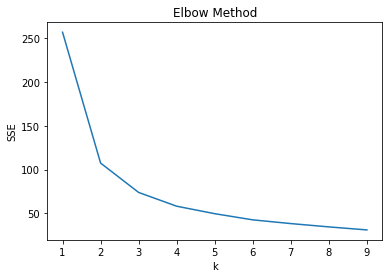

In [18]:
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [23]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [24]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [25]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = df_reduced.join(df_y, how='inner')
combined.head()

,Price,Beds,Baths,Postal_Code,City,Latitude,Longitude,Cluster
0,430000,2,2,L5B 1N1,Mississauga,43.5771,-79.6306,1
1,598000,2,1,M6H 3Z6,Toronto,43.6655,-79.4378,2
2,750000,4,2,L2R 5Y5,St. Catharines,43.1419,-79.2966,2
3,1899000,4,4,L8K 3P3,Hamilton,43.2211,-79.7994,1
4,899000,4,2,L8V 3M7,Hamilton,43.2266,-79.8499,1


<AxesSubplot:title={'center':'Price'}, xlabel='[Cluster]'>

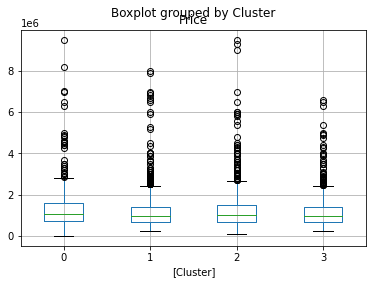

In [26]:
# Plot boxplots of the Price distributions by Cluster
combined.boxplot(['Price'], by=['Cluster'])

<AxesSubplot:xlabel='City'>

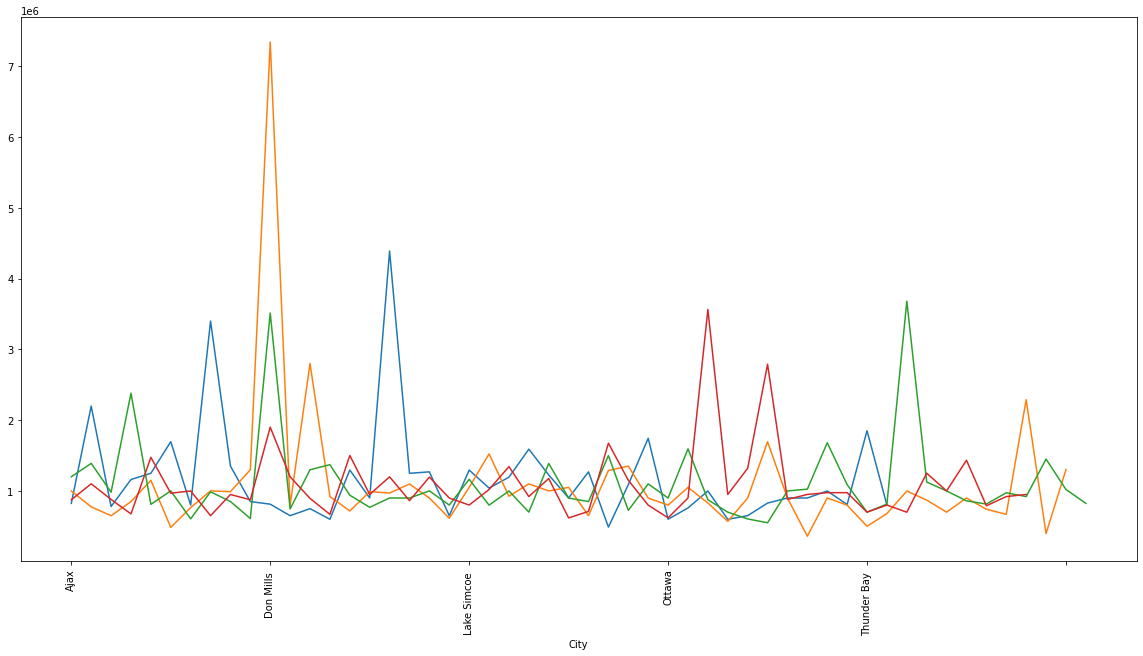

In [28]:
# Plot median price times by city for each cluster

combined[combined['Cluster'] == 0].groupby('City').median()['Price'].plot(rot=90, figsize=(20,10))
combined[combined['Cluster'] == 1].groupby('City').median()['Price'].plot(rot=90, figsize=(20,10))
combined[combined['Cluster'] == 2].groupby('City').median()['Price'].plot(rot=90, figsize=(20,10))
combined[combined['Cluster'] == 3].groupby('City').median()['Price'].plot(rot=90, figsize=(20,10))

In [29]:
combined.to_csv('test3.csv')

In [32]:

nomi = pgeocode.Nominatim('CA')
nomi.query_postal_code('L4J 0G9').county_name

nan